### Set 13 - NLP Unsupervised (Twitter data) Challenges Solutions
#### Last Updated:  3/20/2016
#### Updated By:  Reshama, Julia

---

### Table of Contents 
[Challenge01](#1) 

 
Cluster sentences with K-means. If you have your own Fletcher test data, get sentences out and cluster them. If not, cluster the tweets you gathered during the last challenge set. For each cluster, print out the sentences, try to see how close the sentences are. Try different K values and try to find a K value that makes the most sense (the sentences look like they do form a meaningful cluster).

How do you deal with retweets if you're clustering tweets?


[Challenge02](#2)

Draw the inertia curve over different k values. (Sklearn KMeans class has an inertia_ attribute) 

[Challenge03](#3)

Let's name the clusters 1 For each cluster, find the sentence closest to the centroid of the cluster. (You can use sklearn.metrics.pairwise_distances7 or scipy.spatial.distance4 [check pdist, cdist, and euclidean distance] to find distances to the centroid). KMeans has a cluster_centroids_ attribute. This sentence (closest to centroid) is now the name of the cluster. For each cluster, print the representative sentence, and print 'N people expressed a similar statement', or something like that relevant to your dataset. (This is very close to what amazon used to do in the reviews section up to a year ago.)

Find the biggest 3 clusters, and print their representative sentences (This is close to what amazon is doing now in the reviews section, except they choose the sentence from the most helpful review instead of closest to center) 

[Challenge04](#4)
 
Let's name the clusters 2 Calculate the tf-idf of each word in each cluster (think of all sentences of a cluster together as a document). Represent each cluster with the top 1, or top 2 or... to 5 tf-idf words. For each cluster, print the name (keywords) of the cluster, and "N statements" in the cluster (N is the size of the cluster)

[Challenge05](#5)

Let's name the clusters 3 Same as the previous challenge, but this time, calculate tf-idf only for nouns (NN tag) and build keyword(s) with nouns. (This is close to what amazon switched to last year, before settling into the current design). (They would show five nouns, you would click on one and it would show sentences - linked to the reviews- that were related to that noun.) 

[Challenge06](#6)

Cluster the same data with MiniBatchKMeans4. MiniBatchKMeans is a fast way to apply K-means to large data without much loss -- The results are very similar. Instead of using EVERY single point to find the new place of the centroid, MiniBatch just randomly samples a small number (like 100) in the cluster to calculate the new center. Since this is usually very close to the actual center, the algorithm gets there much faster. Try it and compare the results. Example on two-feature data5

[Challenge07](#7)

Switch the init parameter to "random" (instead of the default kmeans++) and plot the inertia curve for each of the n_init values for K-Means: 1, 2, 3, 10 (n_init is the number of different runs to try with different random initializations)

[Challenge08](#8)

Download this dataset on the Purchase Stats from Clients of a Wholesale Distributor:
https://archive.ics.uci.edu/ml/machine-learning-databases/00292/

Cluster the clients based on their annual spending features (fresh, milk, grocery, frozen, detergents_paper, delicatessen). Remember to scale the features before clustering. After finding a reasonable amount of clusters, for EACH cluster, plot the histogram for every single feature: FRESH, MILK, GROCERY, FROZEN, DETERGENTS_PAPER, DELICATESSEN, CHANNEL, REGION. 

Is there a natural way to characterize each cluster? How would you describe each cluster to the wholesale distributor if you were working for them?

[Challenge08a](#8a) - load into pandas dataframe

[Challenge08b](#8b) - scale the data

[Challenge08c](#8c) - cluster the data

In [133]:
#!pip install textblob

Downloading/unpacking textblob
Downloading/unpacking nltk>=3.0 (from textblob)
  Running setup.py (path:/private/var/folders/f5/4hllfzqx6pq2sfm22_khf5400000gn/T/pip_build_reshamashaikh/nltk/setup.py) egg_info for package nltk
    
  Found existing installation: nltk 2.0.4
    Uninstalling nltk:
      Successfully uninstalled nltk
  Running setup.py install for nltk
    
Cleaning up...


In [33]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from nltk.corpus import treebank_chunk
from nltk.corpus import stopwords
from nltk.corpus import movie_reviews
from nltk.util import ngrams

from textblob import TextBlob

from collections import Counter
from operator import itemgetter


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import scale
from sklearn import metrics


from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans, MiniBatchKMeans

from scipy import sparse

import pymongo
import tweepy
from pymongo import MongoClient


from pprint import pprint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

import requests
from requests_oauthlib import OAuth1

#%base16_mplrc light default
%pylab inline


nltk.data.path.append("/Users/reshamashaikh/_ds/metis/nltk_data")

Populating the interactive namespace from numpy and matplotlib


### <a id='1'></a> Challenge 1

Cluster sentences with K-means. If you have your own Fletcher test data, get sentences out and cluster them. If not, cluster the tweets you gathered during the last challenge set. For each cluster, print out the sentences, try to see how close the sentences are. Try different K values and try to find a K value that makes the most sense (the sentences look like they do form a meaningful cluster).

How do you deal with retweets if you're clustering tweets?

In [ ]:
!pip install requests_oauthlib

In [ ]:
!pip install tweepy

In [4]:
# This is Irmak's twitter account
consumer_key = "lKUArvkhsKdbL22g03K0pjwSn"
consumer_secret = "wSaWT7YCvLGWVnvyRiOeYbio4vMsFQjzZkc9nzTcapZXFeGFg9"
access_token = "16876526-suFANtp7Bs0GE3vCYdBuomCXZzq75Mz4Pzj0ImxGh"
access_secret = "kMOfJZJELwz03ZMKOzV2USFTFyK4IYp5oB7lQKAJUPsWg"

In [5]:
import requests
from requests_oauthlib import OAuth1

oauth = OAuth1(consumer_key,
               client_secret = consumer_secret,
               resource_owner_key = access_token,
               resource_owner_secret = access_secret)

In [6]:
import tweepy

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

Print some tweets from Irmak's twitter profile
Example of accessing tweets from a user

In [7]:
irmak_tweets = api.user_timeline("frrmack", count=3)

for i, tweet in enumerate(irmak_tweets):
    print i, tweet.text
    print

0 Priors and Prejudice in Thinking Machines https://t.co/l55MSIjUI4

1 The couch is lovely, soft and deep. But I have promises to keep. And miles to code before I sleep. And miles to code before I sleep.

2 RT @DsAtweet: A relatively recent addition to our caffeine arsenal at Datascope HQ: Turkish tea! Thanks @frrmack https://t.co/p8OvCLGedR



### Using Data:  tweets related to query term "marchmadness", save 300 tweets to list

In [8]:
search_url = "https://api.twitter.com/1.1/search/tweets.json"
parameters = {"q": "marchmadness", "count":300}
response = requests.get(search_url, params=parameters, auth=oauth)
tweets = response.json()['statuses']

tweets_marchmadness = []

count = 0
print 'PAGE 1'
for tweet in tweets:
    count += 1
    #print type(tweet["text"])
    print count, tweet["text"]
    tweets_marchmadness.append(tweet["text"])
    print
    
next_page_url = search_url + response.json()["search_metadata"]["next_results"]
response = requests.get(next_page_url, auth=oauth)

print 'PAGE 2'
for tweet in response.json()["statuses"]:
    count += 1
    print count, tweet["text"]
    tweets_marchmadness.append(tweet["text"])
    print
    
    
next_page_url = search_url + response.json()["search_metadata"]["next_results"]
response = requests.get(next_page_url, auth=oauth)

print 'PAGE 3'
for tweet in response.json()["statuses"]:
    count += 1
    print count, tweet["text"]
    tweets_marchmadness.append(tweet["text"])
    print
    
    
    

PAGE 1
1 #MarchMadness

2 RT @YNGPfounder: @YNGPfounder RETWEET MY FLYER AND LETS GET IT !!!! Support the #MarchMadness Gangskeet SwaggMobb no competition !

3 RT @PopCrush: It’s @LittleMix’s #Mixers vs. @GirlsGeneration’s #Sones in Round 1 of #MarchMadness: https://t.co/Ci9o8E3tgh https://t.co/5Og…

4 RT @ChoJustice: Beware the #IdesOfMarch = #Shakespeare U.S. We say #MarchMadness  Enjoy it Friends. Dance, Sing,Live cc @ayla79_nl 🌹 https:…

5 RT @SBTVNation: ***RETWEET AND LISTEN NOW***

#SPORTS RADIO LIVE

CLICK HERE: https://t.co/eNplUO5CPr

#NBA #NHL #MarchMadness #Show https:…

6 RT @TaySixO: Believe It Or Not Nigga Yeaaaaaa😈🔥 #MarchMadness

7 RT @Emonn_: Only make 21 once so Ima live it up, happy 21st birthday to me ! #MarchMadness 😈😍🎉😝2️⃣1️⃣ https://t.co/poysq59CHe

8 RT @marchmadness: A career-high for Kris Jenkins as No. 3 Villanova dominates DePaul, 83-62. https://t.co/4wOSaeO0vk

9 RT @marchmadness: Housed!

Senior guard scores 19 as No. 20 Texas A&amp;M uses big 2nd half to

In [ ]:
# Save a list into a pickle file.
import pickle 

datapath = "/Users/reshamashaikh/_ds/metis/solutions/mcnulty_unsupervised/"

# list that will be pickled:  tweets_marchmadness
pickle.dump( tweets_marchmadness, open( datapath+"tweets_marchmadness_list.p", "wb" ) )


In [24]:
# unpickle list of tweets that was previously saved
# we are doing this since the list is dynamic; if we pull tweets, they will change with each run.

# Open the file and call pickle.load.
with open("tweets_marchmadness_list.p", "rb") as f:
    data = pickle.load(f)
    #print("after:", data)

tweets = data

# check pickle file - type, len are same; first 5 tweets match
print '-'*50
print type(tweets)
print len(tweets)
print '-'*50
print tweets[:5]


--------------------------------------------------
<type 'list'>
300
--------------------------------------------------
[u'[Download IT] DJ Limelightz https://t.co/TCbDpu9fsw #2K15 #IBGM http://t.co/Vj6wPcHZzg', u'[Download IT] DJ Limelightz https://t.co/UDkUA1kANO #2K15 #IBGM http://t.co/bRN7u1U3Ei', u'Happy Spring #flowers #ncaatournament #marchmadness #springbreak http://t.co/KeXROvISpi', u"RT @marchmadness: In the toughest moment, a coach's compassion heals. #MarchMadness #RealStrength http://t.co/dZ2pkoWgBS", u'\u201c@marchmadness: "Louisville completes the emotional journey to the championship!"\n\nWatch 2013\'s #OneShiningMoment: https://t.co/JR501gVHwI\u201d']


In [11]:

# clean up tweets
import re
clean_tweets = []

# remove retweets from clean tweets file.
retweets = []

uselist = tweets_marchmadness[:]

for tweet in uselist:
    #print '-'*75
    #print tweet
    
    tweet1 = tweet.replace(' rt ', ' RT ')

    #tweet2 = re.sub(r"(?:\@|https?\://)\S+", "", tweet1)  # this line remove @ symbol and links
    tweet2 = re.sub(r"(https?\://)\S+", "", tweet1)        # this line removes links
    #print tweet2
    
    retweet = re.search(r'RT ', tweet1)
    #print retweet
    if retweet:
        retweets.append(tweet2)
    else:
        clean_tweets.append(tweet2)

In [15]:
print len(clean_tweets)
print len(retweets)


121
179


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import scale

tweet_list =  clean_tweets

vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1,2))
tweet_vectors = vectorizer.fit_transform(tweet_list)

nk = 5
km = KMeans(n_clusters=nk, init='k-means++', max_iter=100, n_init=1)
scale(tweet_vectors,with_mean=False)
clusters = km.fit_predict(tweet_vectors)

print clusters

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 1 2 1 2 3 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 0 2 2 3 2 2 2 2 2 2 2 2 4 2 2 2 3 3 1 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 3 1 3 2 2 1 2 1 0 0 2 2 2 2 2 2
 1 2 2 2 1 3 2 2 2 2]


In [30]:
# visualize the transformation above..
vects=vectorizer.transform(tweet_list)
back=vects.toarray()

tweets_frame=pd.DataFrame(back, columns=vectorizer.get_feature_names())
tweets_frame.head()

,00,00 espnclarksville,00 vs,000,000 marchmadness,02,0844,0844 33,100,100 000,...,year access,years,years college,yep,yep marchmadness,yep yep,yesterday,yesterday temple,youngsteflon,youngsteflon marchmadness
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
features = vectorizer.get_feature_names()

clusters_tweets = {}
for i in range(nk):
    clusters_tweets[i] = []
    
    
for idx, cluster in enumerate(clusters):
    clusters_tweets[cluster].append(tweet_list[idx])

In [19]:
for k in clusters_tweets.keys():
    print (k)
    print (clusters_tweets[k][0:10])

0
[u"The first of three Final Fours that I went to with Florida. Can't wait to go there to cheer for @CanesHoops one day ", u'#MarchMadness, 1/2 off @IslandCreek Oysters, $25 Menu #LobsterRoll #Chowder @Gansettbeer #WhoopiePie @izzysmiami ', u'By _weonent_official via repostwhiz app:\n\U0001f608\U0001f608 3/25 \u2614\ufe0f\u2614\ufe0f #MarchMadness\u2026 ', u'Old creepy GW mascot at 0:02 ', u'25% off all cottages plus $100 gift card with any 2-night stay in March! Visit  or call 800-559-6391.']
1
[u'.@wealthspeaker on #Periscope: STOP being #Fooled with your #Finances #marchmadness #startup #scopestars ', u'.@wealthspeaker on #Periscope: STOP being #Fooled with your #Finances #marchmadness #startup #scopestars ', u'.@wealthspeaker on #Periscope: STOP being #Fooled with your #Finances #marchmadness #startup #scopestars ', u'.@wealthspeaker on #Periscope: STOP being #Fooled with your #Finances #marchmadness #startup #scopestars ', u'.@wealthspeaker on #Periscope: STOP being #Fooled with 

### <a id='2'></a> Challenge 2

Draw the inertia curve over different k values. (Sklearn KMeans class has an inertia_ attribute).

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. 

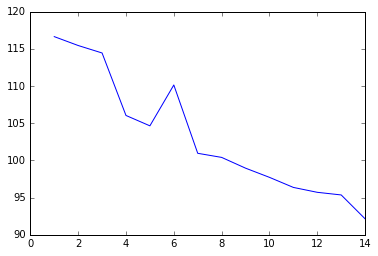

In [20]:
import matplotlib.pyplot as plt

inertia_list = []
maxk = 15
for k in range(1,maxk):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
    scale(tweet_vectors,with_mean=False)
    km.fit(tweet_vectors)
    inertia_list.append(km.inertia_)

plot(range(1,maxk),inertia_list)

### <a id='3'></a> Challenge 3

Let's name the clusters.  For each cluster, find the sentence closest to the centroid of the cluster. (You can use sklearn.metrics.pairwisedistances7 or scipy.spatial.distance4 [check pdist, cdist, and euclidean distance] to find distances to the centroid). KMeans has a cluster_centroids attribute. This sentence (closest to centroid) is now the name of the cluster. For each cluster, print the representative sentence, and print 'N people expressed a similar statement', or something like that relevant to your dataset. (This is very close to what amazon used to do in the reviews section up to a year ago.)

Find the biggest 3 clusters, and print their representative sentences (This is close to what amazon is doing now in the reviews section, except they choose the sentence from the most helpful review instead of closest to center)

In [48]:
vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1,2))
tweet_vectors = vectorizer.fit_transform(tweet_list)

#using 8 clusters, based on the graph above: 
nk = 8
km = KMeans(n_clusters=nk, init='k-means++', max_iter=100, n_init=10)
scale(tweet_vectors,with_mean=False)
clusters = km.fit_predict(tweet_vectors)

features = vectorizer.get_feature_names()

clusters_tweets = {}
for i in range(nk):
    clusters_tweets[i] = []
    
for idx, cluster in enumerate(clusters):
    clusters_tweets[cluster].append(tweet_list[idx])

In [71]:
#Transform tweet_vectors to a cluster-distance space.

#In the new space, each dimension is the distance to each of the cluster centers

dists= km.transform(tweet_vectors)
disd_df = pd.DataFrame(dists)
disd_df.head()


,0,1,2,3,4,5,6,7
0,1.117123,0.832495,1.356524,1.373985,1.134460,1.144923,1.193009,1.414214
1,1.126830,0.983369,1.410880,1.411875,1.153516,1.169096,1.227447,1.414214
2,1.126646,0.991120,1.409866,1.411164,1.157881,1.125448,1.226801,1.414214
3,1.126565,0.994048,1.409419,1.410851,1.166906,1.168440,1.226516,1.414214
4,1.126980,1.001310,1.411707,1.412455,1.168317,1.169467,1.210897,1.414214


In [49]:
# get the tweets that are closest to each of the cluster centroids.. 
nearest_to_centers = list(disd_df.idxmin(axis=0))

print 'For each cluster, printing the sentence closest to the centroid of each cluster'
print 'Cluster size represents number of users who expressed similar sentiment'
print
for idx, cluster in enumerate(nearest_to_centers):
    print 'Cluster ID:                ', idx
    print 'Cluster Size:              ', len(clusters_tweets[idx])
    print 'Cluster Centroid Sentence: ', tweet_list[cluster]
    print("\n")
    
# clusters_tweets[5]

For each cluster, printing the sentence closest to the centroid of each cluster
Cluster size represents number of users who expressed similar sentiment

Cluster ID:                 0
Cluster Size:               4
Cluster Centroid Sentence:  This never gets old.  


Cluster ID:                 1
Cluster Size:               95
Cluster Centroid Sentence:  #MarchMadness


Cluster ID:                 2
Cluster Size:               9
Cluster Centroid Sentence:  .@wealthspeaker on #Periscope: STOP being #Fooled with your #Finances #marchmadness #startup #scopestars 


Cluster ID:                 3
Cluster Size:               2
Cluster Centroid Sentence:  #WIN 2 color changing t-shirts of choice from @delsolcolor Ends 3/3 #Giveaway #marchmadness  


Cluster ID:                 4
Cluster Size:               3
Cluster Centroid Sentence:  By _weonent_official via repostwhiz app:
😈😈 3/25 ☔️☔️ #MarchMadness… 


Cluster ID:                 5
Cluster Size:               3
Cluster Centroid Sentence:  R

### <a id='4'></a> Challenge 4

Let's name the clusters.  Calculate the tf-idf of each word in each cluster (think of all sentences of a cluster together as a document). Represent each cluster with the top 1, or top 2 or... to 5 tf-idf words. For each cluster, print the name (keywords) of the cluster, and "N statements" in the cluster (N is the size of the cluster)

In [121]:
def high_tfidf(X,X_feature_list):
    feature_list = X_feature_list
    for row in range(0,X.shape[0]):
        ir, ic, val = sparse.find(X.getrow(row))
        col_val_pairs = list(zip(list(ic), list(val)))

        top_wold_cols = sorted(col_val_pairs, key=lambda x:x[1])[:-5:-1]  
        
        top_features = []
        for idx in top_wold_cols:
            top_features.append(feature_list[idx[0]])
    return top_features

for cluster, ctweets in clusters_tweets.items():
    vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1,1))
    cluster_vectors = vectorizer.fit_transform(ctweets)
    print (cluster, high_tfidf(cluster_vectors,vectorizer.get_feature_names()),"containing" ,len(ctweets))

(0, [u'mascot', u'gw', u'creepy', u'02'], 'containing', 4)
(1, [u'wawx', u'volunteer', u'visit', u'reporter'], 'containing', 95)
(2, [u'wealthspeaker', u'stop', u'startup', u'scopestars'], 'containing', 9)
(3, [u'win', u'shirts', u'marchmadness', u'giveaway'], 'containing', 2)
(4, [u'visit', u'stay', u'plus', u'night'], 'containing', 3)
(5, [u'telling', u'stressfactorycc', u'really', u'looking'], 'containing', 3)
(6, [u'rosewoodreturns', u'rosewoodfox', u'rosewood', u'morrischestnut3'], 'containing', 4)
(7, [u'went', u'wait', u'fours', u'florida'], 'containing', 1)


### <a id='5'></a> Challenge 5

Let's name the clusters.  Same as the previous challenge, but this time, calculate tf-idf only for nouns (NN tag) and build keyword(s) with nouns. (This is close to what amazon switched to last year, before settling into the current design). (They would show five nouns, you would click on one and it would show sentences - linked to the reviews- that were related to that noun.)

In [124]:
# only for nouns .. 

def just_nouns(tweets):
    tokenizer = TreebankWordTokenizer()
    Nouns=[]
    for i in tweets:
        nouns=[]
        words= tokenizer.tokenize(i)
        tags= pos_tag(words)
        for t in tags: 
            if 'NN' in t[1]:
                nouns.append(t[0])
        Nouns.append(",".join(nouns))
    return Nouns

for cluster, ctweets in clusters_tweets.items():
    # getting tfidf's on a cluster by cluster basis for nouns only:
    nounified= just_nouns(ctweets)
    vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1,1))
    cluster_vectors=vectorizer.fit_transform(nounified)
    print cluster,high_tfidf(cluster_vectors,vectorizer.get_feature_names()),"containing" ,len(ctweets)
    



0 [u'old', u'mascot', u'gw', u'creepy'] containing 4
1 [u'wawx', u'volunteer', u'visit', u'reporter'] containing 95
2 [u'wealthspeaker', u'stop', u'startup', u'scopestars'] containing 9
3 [u'win', u'shirts', u'marchmadness', u'giveaway'] containing 2
4 [u'visit', u'stay', u'march', u'gift'] containing 3
5 [u'stressfactorycc', u'kick', u'joke', u'tournament'] containing 3
6 [u'rosewoodreturns', u'rosewoodfox', u'rosewood', u'morrischestnut3'] containing 4
7 [u'fours', u'florida', u'final', u'day'] containing 1


### <a id='6'></a> Challenge 6

Cluster the same data with MiniBatchKMeans4. MiniBatchKMeans is a fast way to apply K-means to large data without much loss -- The results are very similar. Instead of using EVERY single point to find the new place of the centroid, MiniBatch just randomly samples a small number (like 100) in the cluster to calculate the new center. Since this is usually very close to the actual center, the algorithm gets there much faster. Try it and compare the results. Example on two-feature data

In [125]:
nk = 8
vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1,2))
tweet_vectors = vectorizer.fit_transform(tweet_list)

km = MiniBatchKMeans(n_clusters=nk, init='k-means++', max_iter=100, n_init=10)
scale(tweet_vectors,with_mean=False)

clusters = km.fit_predict(tweet_vectors)

dists= km.transform(tweet_vectors)
disd_df = pd.DataFrame(dists)

nearest_to_centers = list(disd_df.idxmin(axis=0))

for idx, cluster in enumerate(nearest_to_centers):
    print(tweet_list[cluster],"containing" ,len(clusters_tweets[idx]))
    print("\n")

(u'MONSTER card for today!!!! 65***** UNITS in play.  $100 for 1 YEAR of all access VIP wagers!! #marchMADNESS #MLB', 'containing', 4)


(u'.@wealthspeaker on #Periscope: STOP being #Fooled with your #Finances #marchmadness #startup #scopestars ', 'containing', 95)


(u'#MarchMadness', 'containing', 9)


(u'What2Watch #MarchMadness 2nite #TV: 8-11pm @ABC f/: #TheGoldbergs; #TheRealONeals #SeriesPremiere; #ModernFamily &amp; @TheRealONeals!', 'containing', 2)


(u'College bball #champweek is here! #MarchMadness is nearly upon us! \U0001f3c0\U0001f389\U0001f3c0\U0001f389\U0001f3c0 ', 'containing', 3)


(u'This never gets old.  ', 'containing', 3)


(u'#WIN 2 color changing t-shirts of choice from @delsolcolor Ends 3/3 #Giveaway #marchmadness  ', 'containing', 4)


(u'Get double on all in store printing! The perfect time to get your promotional materials! #printing #brochures #MarchMadness #DoubleYourPrint', 'containing', 1)




### <a id='7'></a> Challenge 7

Switch the init parameter to "random" (instead of the default kmeans++) and plot the inertia curve for each of the n_init values for K-Means: 1, 2, 3, 10 (n_init is the number of different runs to try with different random initializations)

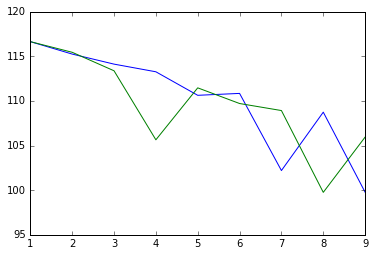

In [126]:
inertia_list = []
maxk=10
for k in range(1,maxk):
    km = KMeans(n_clusters=k, init='random', max_iter=100, n_init=1)
    scale(tweet_vectors,with_mean=False)
    km.fit(tweet_vectors)
    inertia_list.append(km.inertia_)
    
inertia_list_kp = []
maxk=10
for k in range(1,maxk):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
    scale(tweet_vectors,with_mean=False)
    km.fit(tweet_vectors)
    inertia_list_kp.append(km.inertia_)

plt.plot(range(1,maxk),inertia_list,range(1,maxk),inertia_list_kp )

### <a id='8'></a> Challenge 8

Download this dataset on the Purchase Stats from Clients of a Wholesale Distributor:
https://archive.ics.uci.edu/ml/machine-learning-databases/00292/

Cluster the clients based on their annual spending features (fresh, milk, grocery, frozen, detergents_paper, delicatessen). Remember to scale the features before clustering. After finding a reasonable amount of clusters, for EACH cluster, plot the histogram for every single feature: FRESH, MILK, GROCERY, FROZEN, DETERGENTS_PAPER, DELICATESSEN, CHANNEL, REGION. 

Is there a natural way to characterize each cluster? 

How would you describe each cluster to the wholesale distributor if you were working for them?

In [130]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00292/ 

--2016-03-02 13:32:28--  https://archive.ics.uci.edu/ml/machine-learning-databases/00292/
Resolving archive.ics.uci.edu... 128.195.10.249
Connecting to archive.ics.uci.edu|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1044 (1.0K) [text/html]
Saving to: 'index.html.1'

index.html.1        100%[=====================>]   1.02K  --.-KB/s   in 0s     

2016-03-02 13:32:29 (28.4 MB/s) - 'index.html.1' saved [1044/1044]

/Users/julialintern/ds_winter/: Scheme missing.
FINISHED --2016-03-02 13:32:29--
Total wall clock time: 1.0s
Downloaded: 1 files, 1.0K in 0s (28.4 MB/s)


#### <a id='8a'></a> Challenge 8a - load into pandas dataframe

In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [271]:
df = pd.read_csv("wholesale.csv")

In [272]:
# take look at data 
def CheckData(df):
    print "len(df): ", len(df)
    print "\n"
    print "column names:"
    print df.columns
    print "\n"
    print "data types: "
    print df.dtypes
    print "\n"
    print df.head(3)
    #print "\n"
    #print df.tail(5)
    print "\n"
    print df.describe()
    
CheckData(df)

len(df):  440


column names:
Index([u'Channel', u'Region', u'Fresh', u'Milk', u'Grocery', u'Frozen',
       u'Detergents_Paper', u'Delicassen'],
      dtype='object')


data types: 
Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844


          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   

In [4]:
# Check frequency distribution of categorical parameters
by_channel = df.groupby('Channel')
#print by_channel
print by_channel.count()

print "\n"
by_region = df.groupby('Region')
print by_region.count()

         Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Channel                                                                    
1           298    298   298      298     298               298         298
2           142    142   142      142     142               142         142


        Channel  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Region                                                                     
1            77     77    77       77      77                77          77
2            47     47    47       47      47                47          47
3           316    316   316      316     316               316         316


In [5]:
# Another way to see frequency counts
df['Region'].value_counts()

3    316
1     77
2     47
dtype: int64

In [6]:
grouped = df.groupby(['Channel', 'Region'])
print grouped.count()

                Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Channel Region                                                            
1       1          59    59       59      59                59          59
        2          28    28       28      28                28          28
        3         211   211      211     211               211         211
2       1          18    18       18      18                18          18
        2          19    19       19      19                19          19
        3         105   105      105     105               105         105


#### <a id='8b'></a> Challenge 8b - scale the data

In [273]:
#Apply operates on each row or column with the lambda function
#axis = 0 -> act on columns, axis = 1 act on rows
#x is a variable for the whole row or column
#This line will scale minimum = 0 and maximum = 1 for each column
df2 = df.apply(lambda x:(x.astype(float) - min(x))/(max(x)-min(x)), axis = 0)

In [274]:
df2[:5]
#df2[:-10] # print last 10 rows

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,1,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1,1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1,1,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0,1,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1,1,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


In [13]:
grouped2 = df2.groupby(['Channel', 'Region'])
print grouped2.count()

                Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Channel Region                                                            
0       0.0        59    59       59      59                59          59
        0.5        28    28       28      28                28          28
        1.0       211   211      211     211               211         211
1       0.0        18    18       18      18                18          18
        0.5        19    19       19      19                19          19
        1.0       105   105      105     105               105         105


#### <a id='8c'></a> Challenge 8c - Cluster the Data

In [275]:
print df2.columns[2:].values
data=df2[df2.columns[2:].values]

data.head()

['Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergents_Paper' 'Delicassen']


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


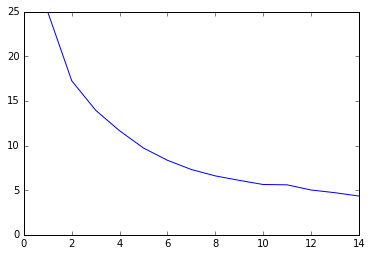

In [179]:
# Looking for the optimal # of clusters first

# I will use the scaled data (and will also drop columns: 'Channel and Region' 
# bc: the Objective is to cluster based on spending features

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import scale

data=df2[df2.columns[2:].values]

inertia_list_shopping = []
maxk = 15

for k in range(1,maxk):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
    scale(data,with_mean=False)
    km.fit(data)
    inertia_list_shopping.append(km.inertia_)

plot(range(1,maxk),inertia_list_shopping)



Source:
http://www.slideshare.net/SarahGuido/kmeans-clustering-with-scikitlearn

In [187]:
# Based on the above plot, an ideal # of clusters is approx. 8
from sklearn.cluster import KMeans, MiniBatchKMeans

kmeans = KMeans(n_clusters=8)
kmeans.fit(data)

labels=kmeans.predict(data)

In [191]:
print len(df)
print len(pca_d)

440
440


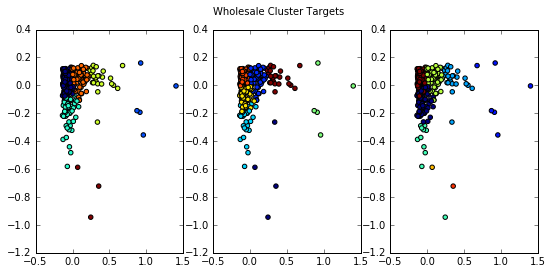

In [203]:
# I want to visualize my clusters, I am goint to transform my data into 2 features, 
# so I can plot on 2 dimensions

from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_d=pca.fit_transform(data)
# a sample of our data with the reduced dimensions.. 

# Based on the above plot, an ideal # of clusters is approx. 8
from sklearn.cluster import KMeans, MiniBatchKMeans




## -- 6 Clusters-- 
kmeans = KMeans(n_clusters=6)
kmeans.fit(data)
labels=kmeans.predict(data)
fig, ax = plt.subplots(1, 3, figsize=[9, 4])
ax[0].scatter(pca_d[:,0],pca_d[:,1],c=labels)
fig.suptitle('Wholesale Cluster Targets')

## -- 7 Clusters-- 
kmeans = KMeans(n_clusters=7)
kmeans.fit(data)
labels=kmeans.predict(data)
ax[1].scatter(pca_d[:,0],pca_d[:,1],c=labels)

## -- 8 Clusters-- 
kmeans = KMeans(n_clusters=8)
kmeans.fit(data)
labels=kmeans.predict(data)
ax[2].scatter(pca_d[:,0],pca_d[:,1],c=labels)

# Judging by this plot I think 6 or 7 clusters make the most sense.. 

In [276]:
# append cluster predictions to our data set:


km=KMeans(n_clusters=8)
km.fit(data)
data['clusters']=km.predict(data)

/Users/julialintern/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


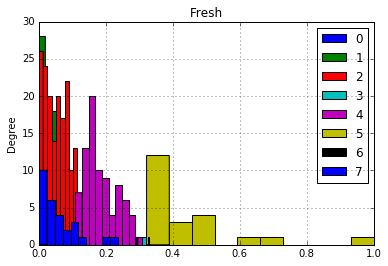

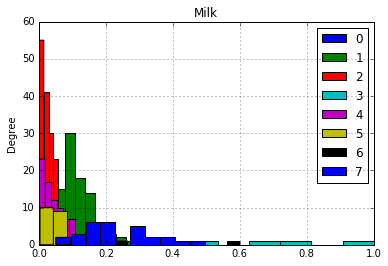

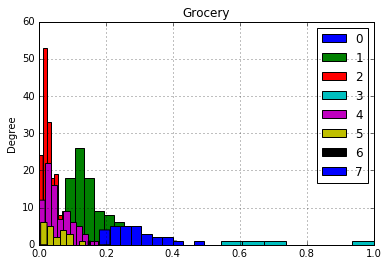

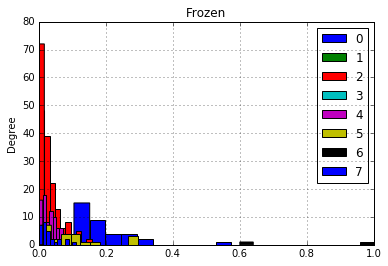

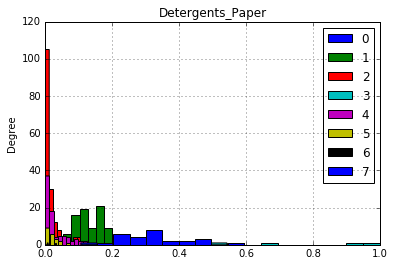

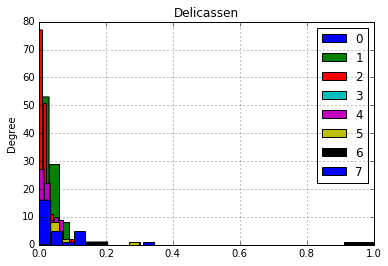

In [388]:
# genereate scatterplot matrices for each cluster..  : 
features = ['Fresh',
        'Milk',
        'Grocery',
        'Frozen',
        'Detergents_Paper',
        'Delicassen']

#fig, axes = plt.subplots(1,7,figsize=[14, 6])
for i in range(6):
    data_clusters[features[i]].plot(kind='hist',labels=True, title=features[i])
    ax=axes[i]
    plt.legend()
    plt.show()
    
    


####  Summary of Clusters:  
Judging by the distributions for the different features, we can 
develop the following generalizations about our clusters:
    
Cluster 0 & 1: 'The Small Market Clusters': Seems to have higher distributions for most features (except Produce)  
Cluster 2 & 4 :'The Bodega Clusters' : Many small sized purchases of everything  
Cluster 3: 'Ice cream shop Cluster : Large, but infrequent purchases of dairy and grocery   
Cluster 5:'The Garden-Fresh Cluster': Large purchases of Fresh produce  
Cluster 6: 'Catering Cluster': Large infrequent purchases of Delicassen, Frozen & Dairy  
Cluster 7:' Medium Market Cluster: Medium sized purchases on most items  
